In [1]:
import sys
sys.path.append(r"C:\Users\Federico\Documents\GitHub\pysical_locomotion")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from analysis.RNN.task import GoalDirectedLocomotionDataset

## dataset inspection
Plot a bunch of stuff from the dataset to get an idea of how exactly it looks like.

#### Load dataset

In [2]:
data = GoalDirectedLocomotionDataset(
    max_dataset_length=500, horizon=0
)
print(f"Dataset has {len(data)} trials")

Generating data... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--

Dataset has 385 trials


In [3]:
x, y = data[0]
print(f'Inputs shape: {x.shape}')
print(f'Outputs shape: {y.shape}')

Inputs shape: torch.Size([151, 5])
Outputs shape: torch.Size([151, 2])


In [4]:
data._inputs

['n', 'ψ', 's', 'V', 'ω']

In [5]:
data._outputs

('V̇', 'ω̇')

## plot a few trials

## Collated plots
Get all data from all trials together and plot variables one against the other

In [6]:
# inputs = pd.concat(data._raw_data)


inputs = pd.DataFrame({k:
    np.hstack([x[:, i] for x,_ in data.items.values()]).ravel()
     for i, k in enumerate(data._inputs)}
)

inputs[data._outputs[0]] = np.hstack([y[:, 0] for _,y in data.items.values()]).ravel()
inputs[data._outputs[1]] = np.hstack([y[:, 1] for _,y in data.items.values()]).ravel()

inputs.max()

n     1.0000
ψ     0.8594
s     1.0000
V     1.0000
ω     1.0000
V̇    1.0000
ω̇    1.0000
dtype: float32

<Figure size 1440x720 with 9 Axes>

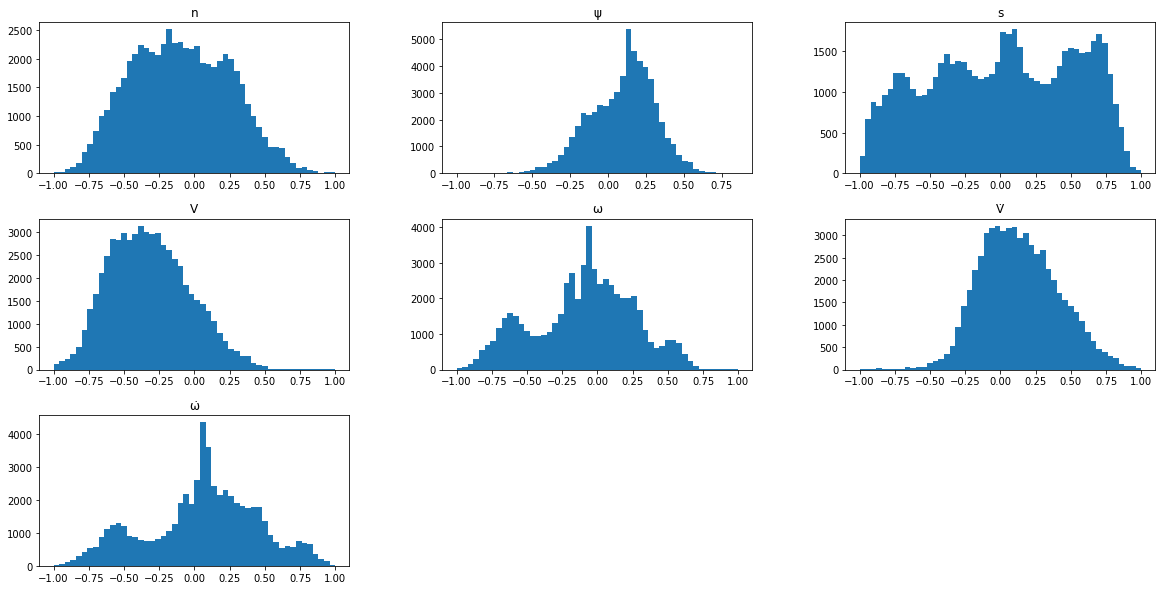

In [7]:
%matplotlib inline

_ = inputs.hist(figsize=(20, 10), grid=False, bins=50)

<Figure size 1440x1440 with 49 Axes>

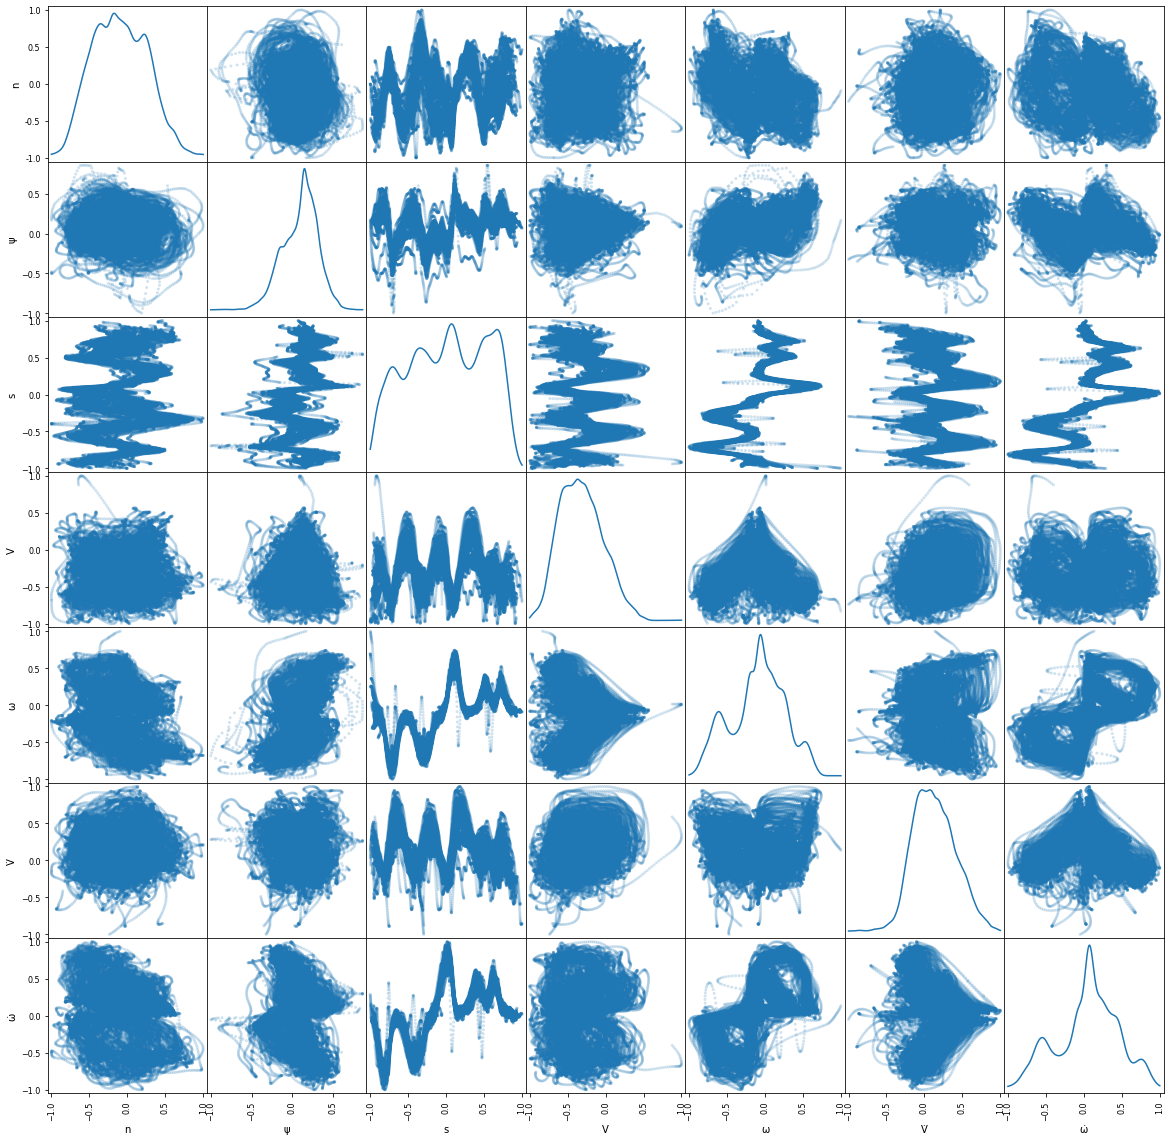

In [8]:
from pandas.plotting import scatter_matrix

_ = scatter_matrix(inputs, alpha=0.2, figsize=(20, 20), diagonal="kde")

<Figure size 864x576 with 1 Axes>

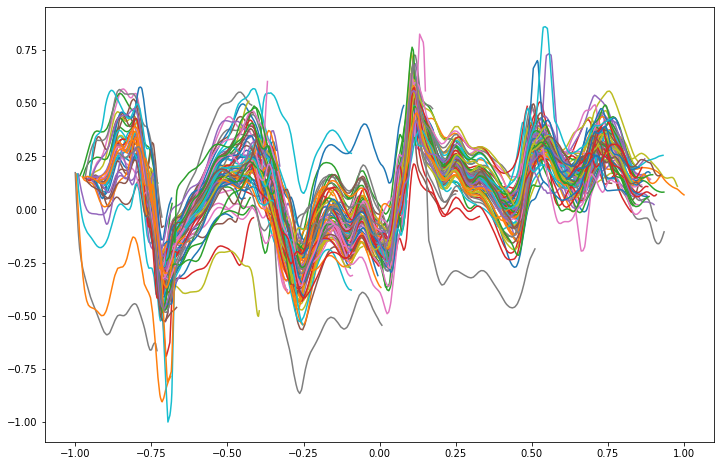

In [9]:
# plot ψ for all trials
f, ax = plt.subplots(figsize=(12, 8))

for (x, y) in data.items.values():
    ax.plot(x[:, 2], x[:, 1])

[<matplotlib.lines.Line2D object at 0x000001A21EAD44F0>]

<Figure size 432x288 with 1 Axes>

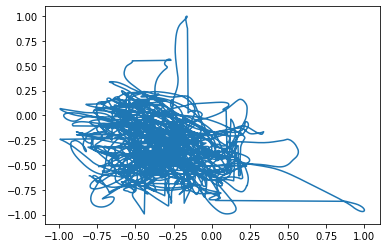

In [10]:
plt.plot(inputs.V[:10000], inputs.V[100:10000+100])